In [12]:
import PyMca5 as mca
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Initialise some variables
specdir = '/users/zatterin/Documents/data/IHR_20161114/spec/'
sample_name = 'e16095'
rois = ['mpx4int', 'mpx4ro1', 'mpx4ro2']

In [10]:
# See kmap files corresponding to specified sample name
files = !ls {specdir} | grep spec | grep fast | grep -i {sample_name}
for fname in files: print(fname)

20161115_E16095_fast_00011.spec
20161117_E16095_fast_00003.spec
20161117_E16095_fast_00005.spec


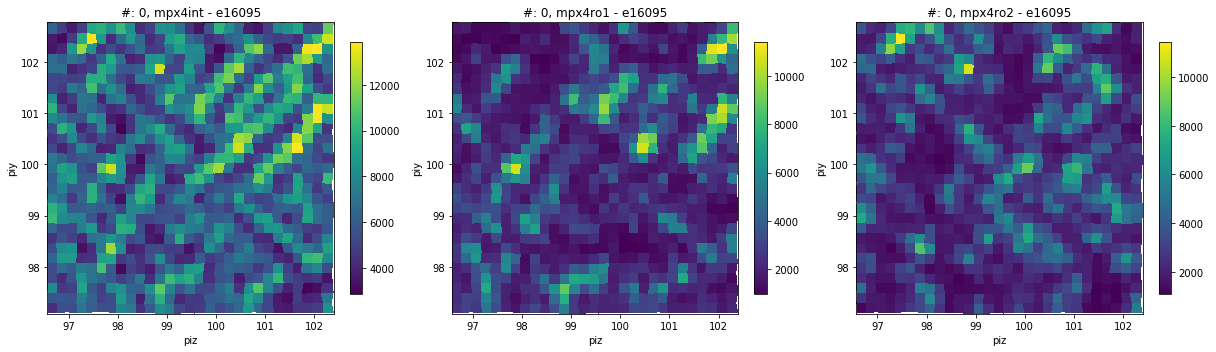

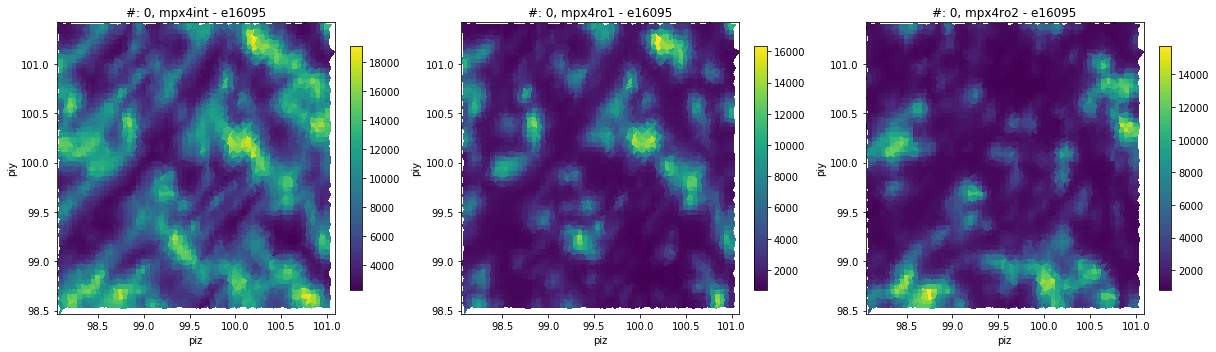

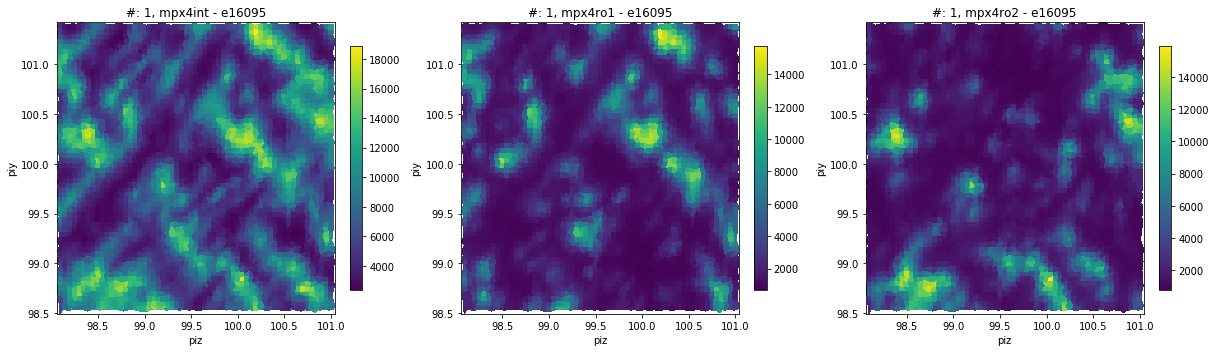

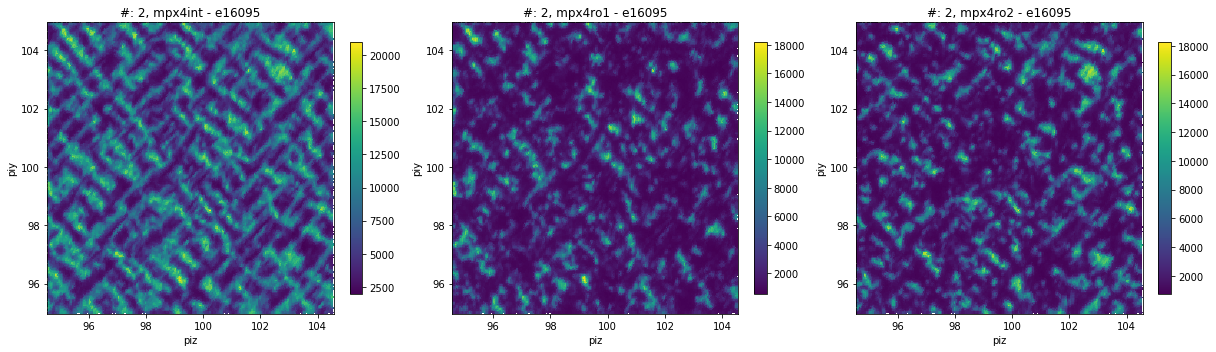

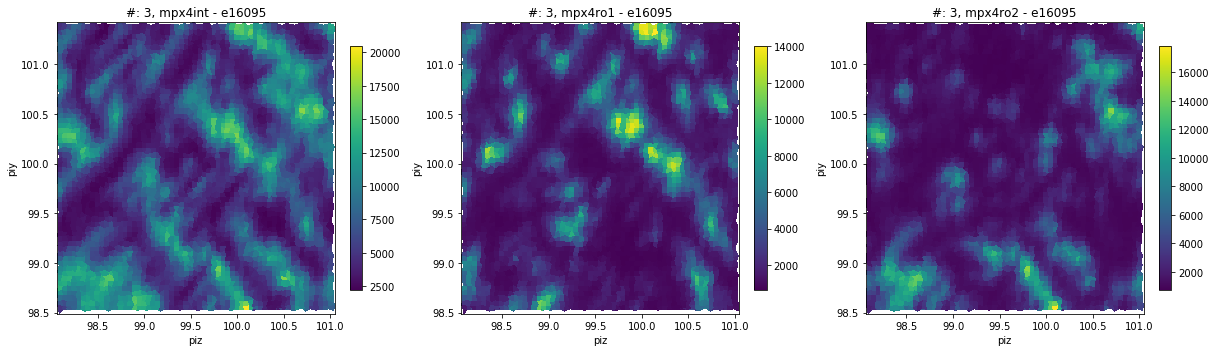

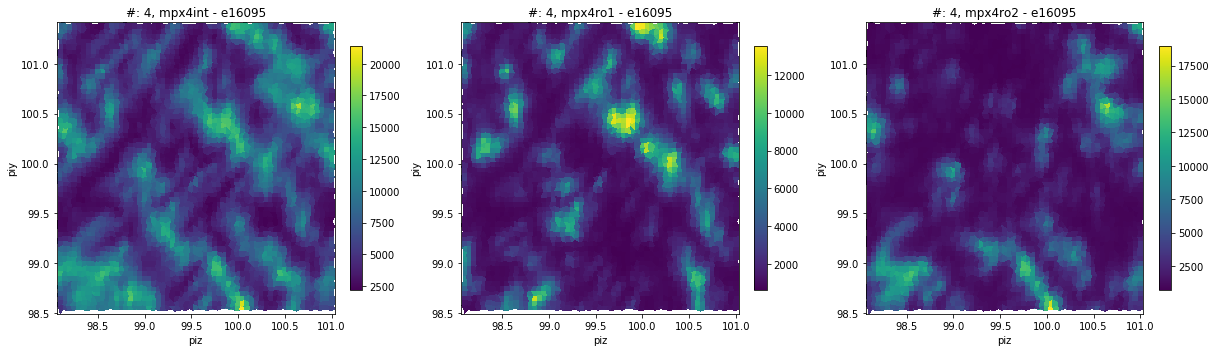

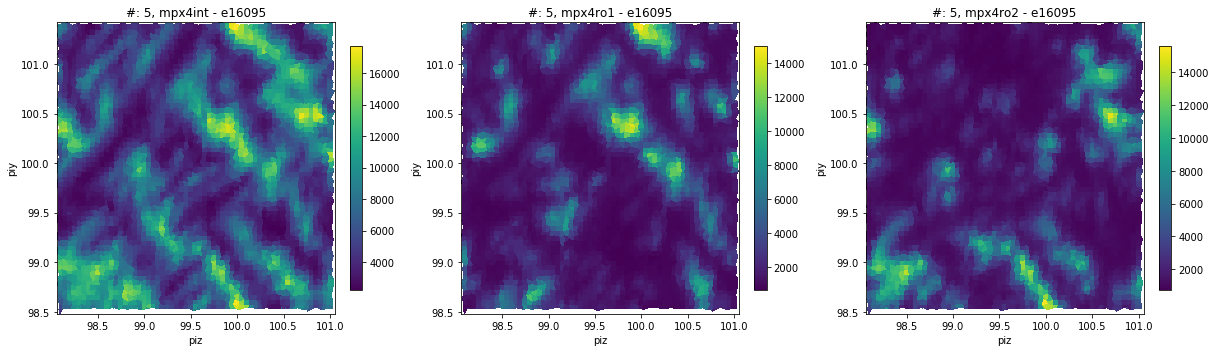

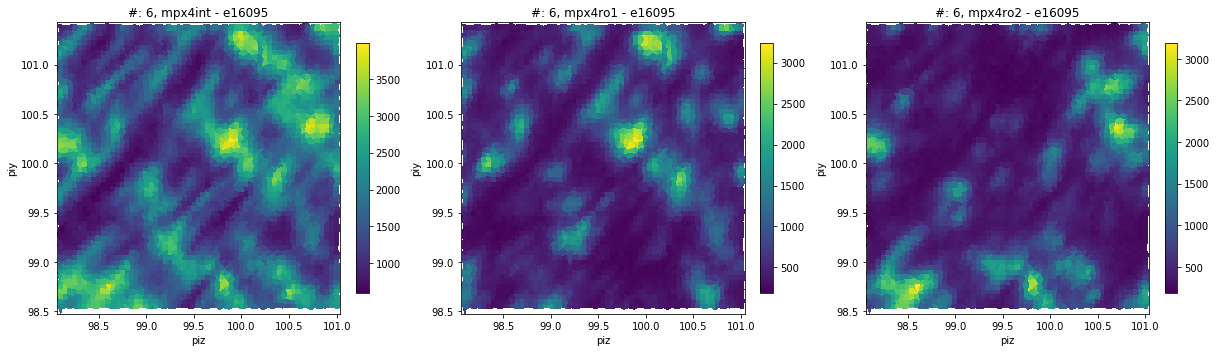

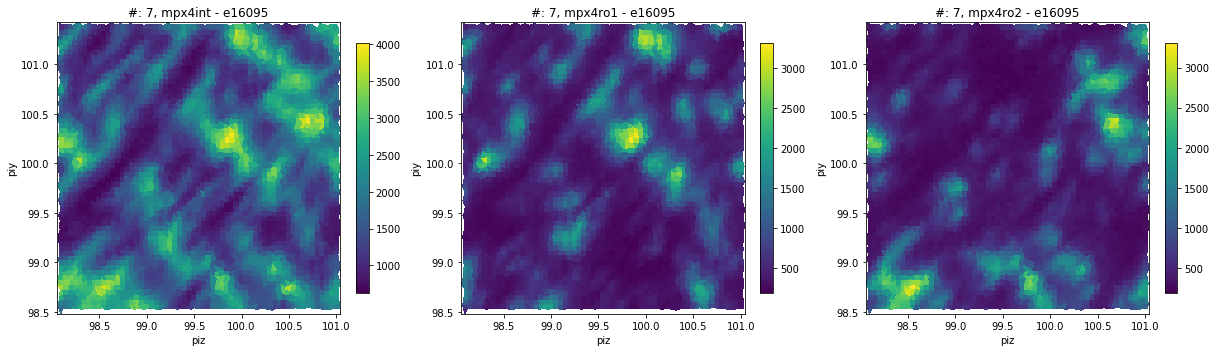

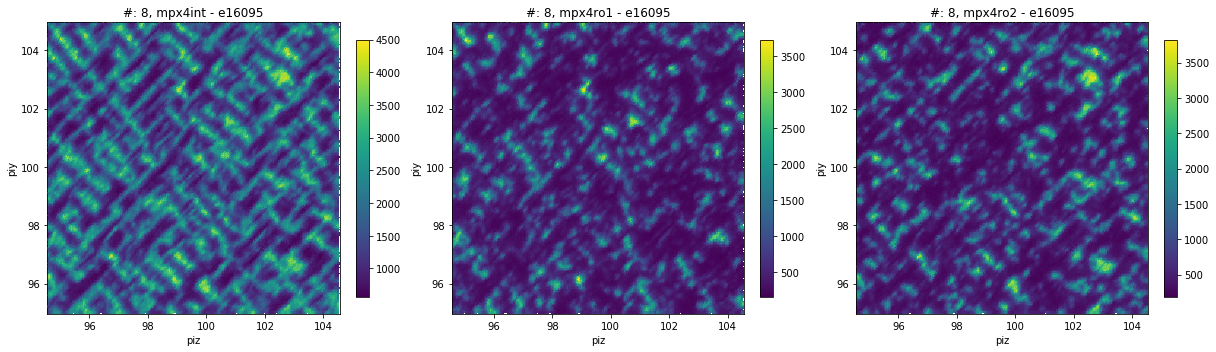

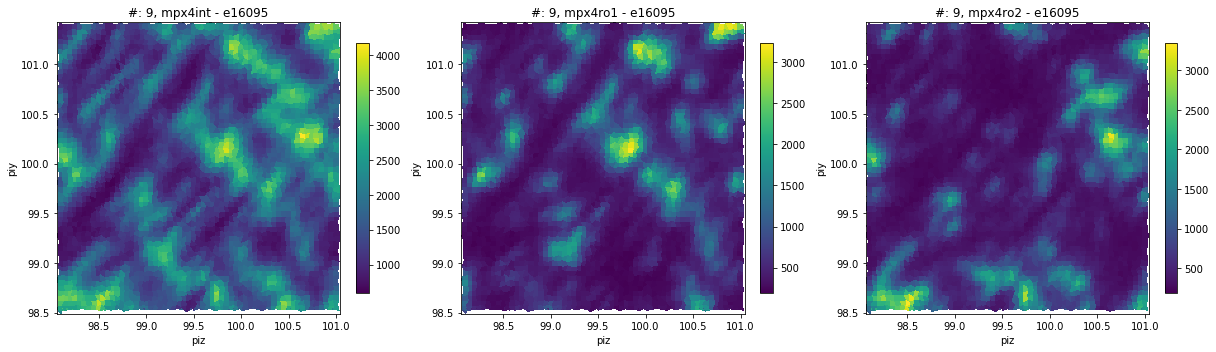

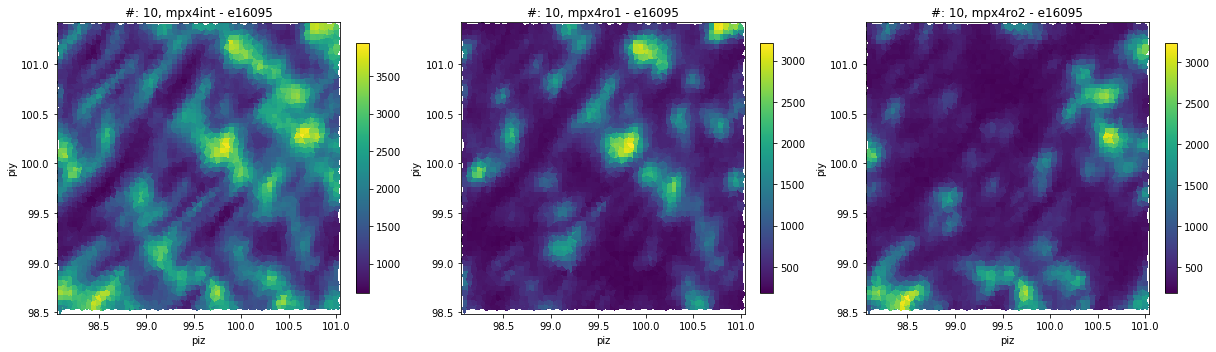

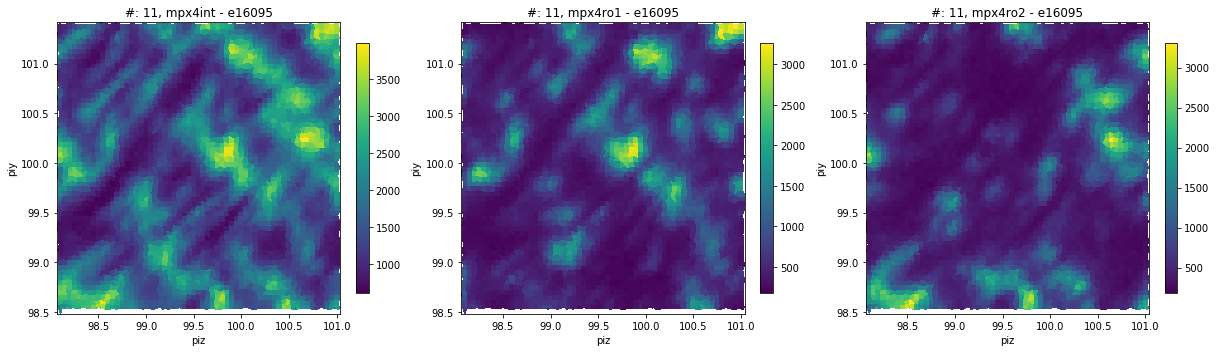

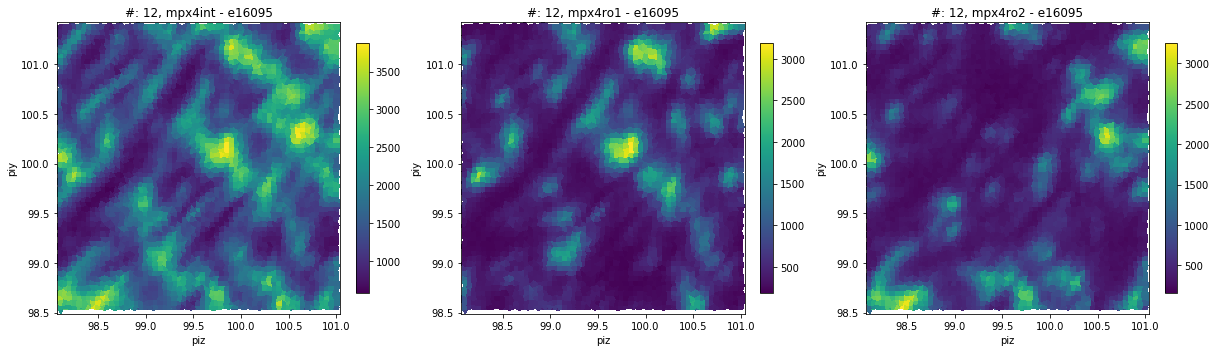

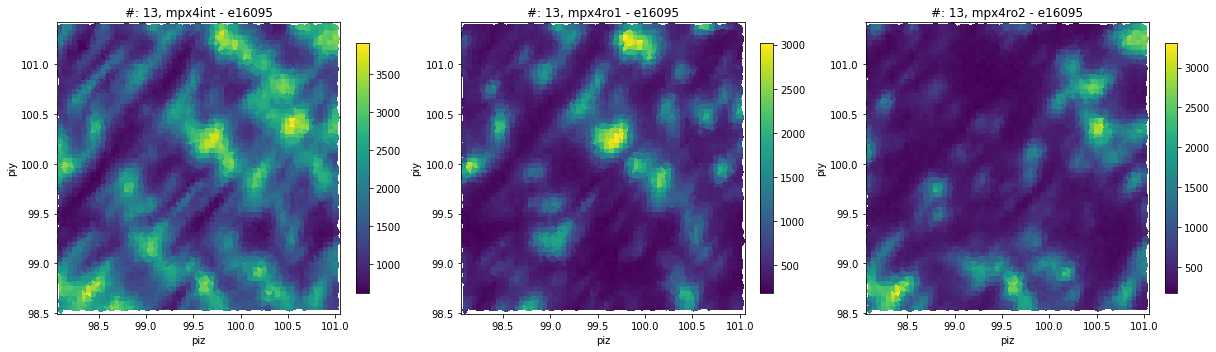

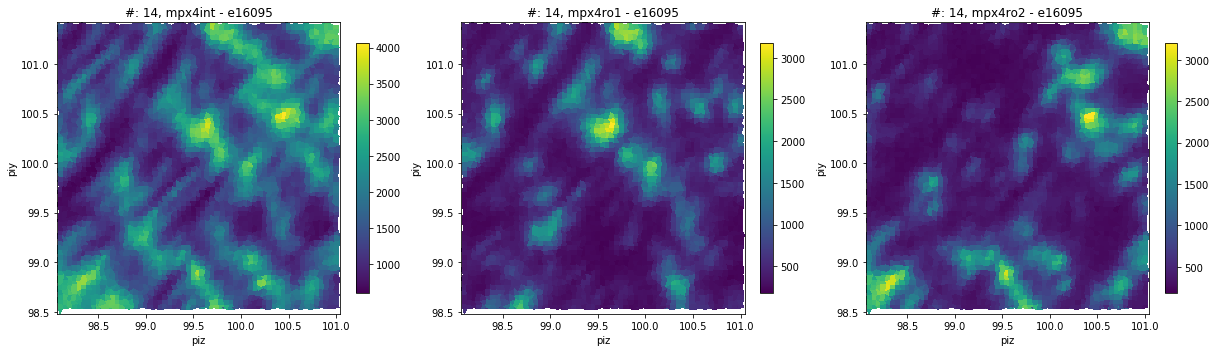

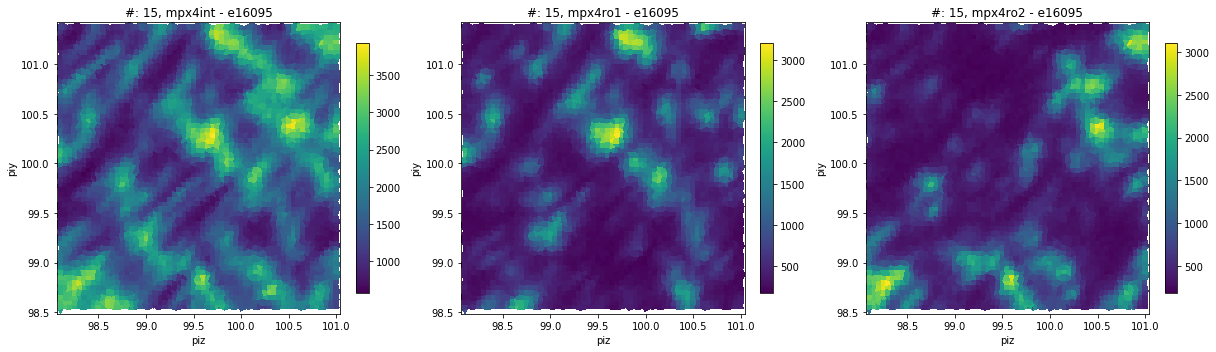

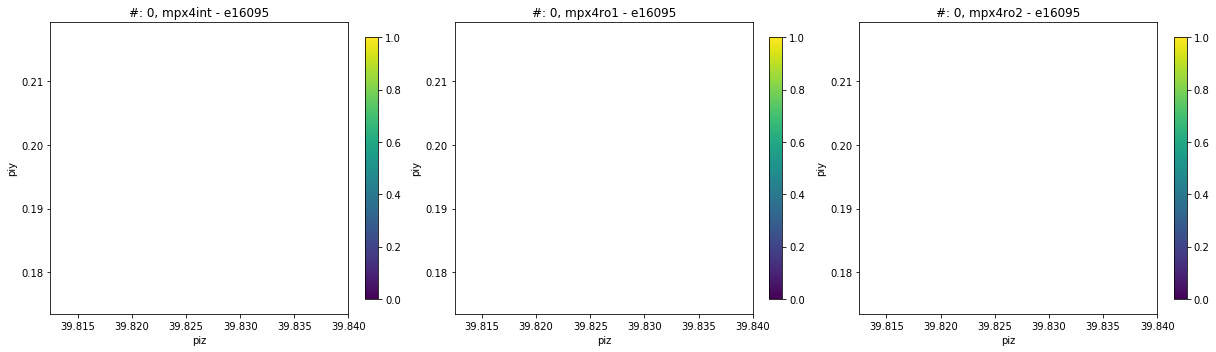

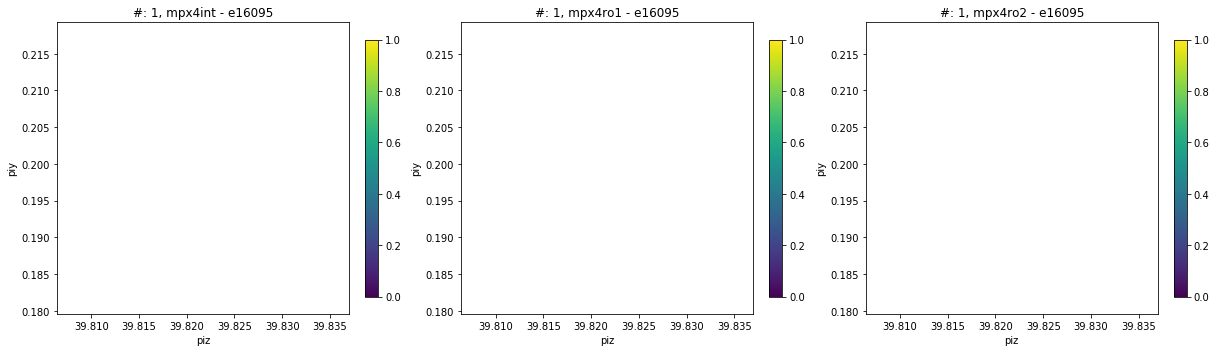

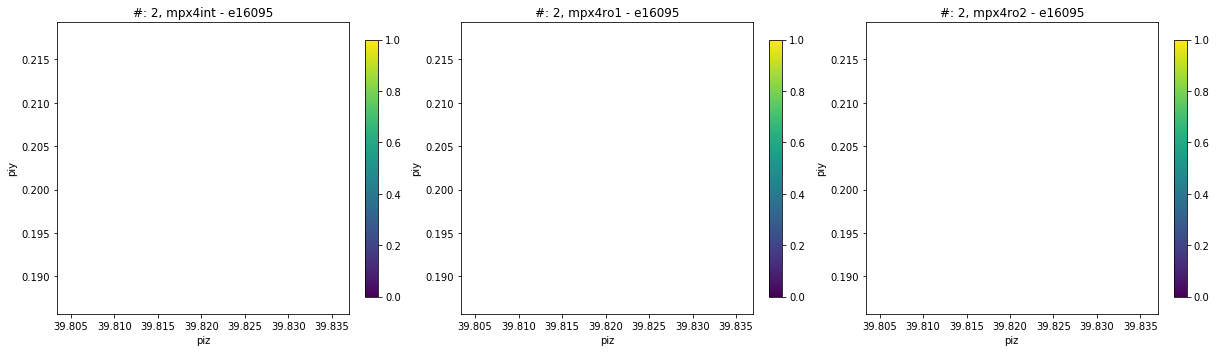

In [13]:
for specfile in files:
    sf = mca.specfile.Specfile(specdir+specfile)
    for scan_no in np.arange(sf.scanno()):

        # get the scan
        scan = sf[scan_no]
        # get the data and the rois
        data = scan.data()
        index_list = scan.alllabels()

        # plotting
        fig = plt.figure(figsize=(17,5))
        tot_fig = len(rois)

        for index, what2plot in enumerate(rois): # rois tbd beforehand

            plt.subplot(1, tot_fig, index+1)
            # load data
            rawdata = data[index_list.index(what2plot)]
            motor_1 = data[index_list.index('adcX')]
            motor_2 = data[index_list.index('adcY')]
            new_shape = (int(scan.command().split()[8]), int(scan.command().split()[4]))
            # apply dimensions
            rawdata.shape, motor_1.shape, motor_2.shape = new_shape, new_shape, new_shape
            # plot it
            plt.pcolormesh(motor_1, motor_2, rawdata)
            plt.axis([motor_1.min(),motor_1.max(),motor_2.min(),motor_2.max()])
            plt.ylabel('piy')
            plt.xlabel('piz')
            plt.colorbar(fraction=0.04)
            plt.title('#: {0}, {1} - '.format(scan_no, what2plot)+sample_name)
    #       plt.axes().set_aspect('equal') can't use it, looks difficult to fix... figsize for now.
        fig.tight_layout()
#         plt.savefig('../img/kmaps_pcolormesh/{0}/{1}_n{2}.png'.format(sample_name,specfile,scan_no))